# Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
dataset= pd.read_csv("Annual gold price data.csv")
dataset

,Year,Price in USD
0,1950,34.720
1,1951,34.660
2,1952,34.790
3,1953,34.850
4,1954,35.040
...,...,...
65,2015,1068.317
66,2016,1152.165
67,2017,1265.674
68,2018,1249.887


# Data preprocessing

In [4]:
dataset['Year']=dataset['Year'].astype(float)
dataset

,Year,Price in USD
0,1950.0,34.720
1,1951.0,34.660
2,1952.0,34.790
3,1953.0,34.850
4,1954.0,35.040
...,...,...
65,2015.0,1068.317
66,2016.0,1152.165
67,2017.0,1265.674
68,2018.0,1249.887


In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1:2].values

In [6]:
x

array([[1950.],
       [1951.],
       [1952.],
       [1953.],
       [1954.],
       [1955.],
       [1956.],
       [1957.],
       [1958.],
       [1959.],
       [1960.],
       [1961.],
       [1962.],
       [1963.],
       [1964.],
       [1965.],
       [1966.],
       [1967.],
       [1968.],
       [1969.],
       [1970.],
       [1971.],
       [1972.],
       [1973.],
       [1974.],
       [1975.],
       [1976.],
       [1977.],
       [1978.],
       [1979.],
       [1980.],
       [1981.],
       [1982.],
       [1983.],
       [1984.],
       [1985.],
       [1986.],
       [1987.],
       [1988.],
       [1989.],
       [1990.],
       [1991.],
       [1992.],
       [1993.],
       [1994.],
       [1995.],
       [1996.],
       [1997.],
       [1998.],
       [1999.],
       [2000.],
       [2001.],
       [2002.],
       [2003.],
       [2004.],
       [2005.],
       [2006.],
       [2007.],
       [2008.],
       [2009.],
       [2010.],
       [2011.],
       [

In [7]:
y

array([[  34.72 ],
       [  34.66 ],
       [  34.79 ],
       [  34.85 ],
       [  35.04 ],
       [  34.97 ],
       [  34.9  ],
       [  34.99 ],
       [  35.09 ],
       [  35.05 ],
       [  35.54 ],
       [  35.15 ],
       [  35.08 ],
       [  35.08 ],
       [  35.12 ],
       [  35.13 ],
       [  35.18 ],
       [  35.19 ],
       [  41.113],
       [  35.189],
       [  37.434],
       [  43.455],
       [  63.779],
       [ 106.236],
       [ 183.683],
       [ 139.279],
       [ 133.674],
       [ 160.48 ],
       [ 207.895],
       [ 463.666],
       [ 596.712],
       [ 410.119],
       [ 444.776],
       [ 388.06 ],
       [ 319.622],
       [ 321.985],
       [ 391.595],
       [ 487.079],
       [ 419.248],
       [ 409.655],
       [ 378.161],
       [ 361.875],
       [ 334.657],
       [ 383.243],
       [ 379.48 ],
       [ 387.445],
       [ 369.338],
       [ 288.776],
       [ 291.357],
       [ 283.743],
       [ 271.892],
       [ 275.992],
       [ 333

# Splitting

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(x,y, test_size=1/3, random_state=0)

In [9]:
train_data.shape

(46, 1)

In [10]:
test_data.shape

(24, 1)

In [11]:
train_targets

array([[  35.15 ],
       [  34.85 ],
       [ 442.974],
       [ 387.445],
       [  35.54 ],
       [ 361.875],
       [ 283.743],
       [ 407.674],
       [ 803.618],
       [ 444.776],
       [  35.12 ],
       [1265.674],
       [  35.189],
       [ 463.666],
       [ 333.3  ],
       [ 321.985],
       [  41.113],
       [  34.72 ],
       [  35.13 ],
       [  34.97 ],
       [  35.18 ],
       [  37.434],
       [1152.165],
       [  35.09 ],
       [  35.08 ],
       [ 139.279],
       [ 487.079],
       [  35.19 ],
       [1393.512],
       [ 369.338],
       [1221.588],
       [ 409.655],
       [ 419.248],
       [  34.66 ],
       [ 819.94 ],
       [  35.08 ],
       [1652.725],
       [ 183.683],
       [  34.9  ],
       [ 106.236],
       [ 391.595],
       [  43.455],
       [  35.05 ],
       [1200.44 ],
       [ 288.776],
       [ 379.48 ]])

# Normalize

In [12]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Model defining

In [13]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# K-fold validation

# Epochs=100

In [14]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [15]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    #Prepares trainning data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    #Build keras model and train in silent mode (verbose=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0












processing fold # 1
processing fold # 2
processing fold # 3


# Running this with num_epochs = 100 yields the following results:

In [16]:
all_scores

[188.34808349609375, 88.3181381225586, 141.84683227539062, 124.4718017578125]

In [17]:
np.mean(all_scores)

135.74621391296387

# Epochs=500

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [19]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plotting validation scores

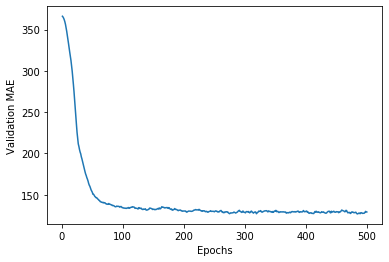

In [20]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Again plotting excluding first 10 data points

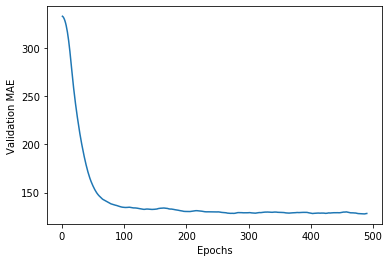

In [22]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Trainning

In [23]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

24/24 [==============================] - 1s 25ms/step


# Mean absolute error

In [24]:
test_mae_score

448.3313903808594